In [1]:
YALEFACES_DIRECTORY = "C:\\Users\\Calvintai0402\\my_env\\datasets\\YaleFaces\\yalefaces"

In [19]:
# ONLY DO ONCE
# import os

# for file in os.listdir(YALEFACES_DIRECTORY):
#     if file.startswith("subject"):
#         os.chdir("C:\\Users\\Calvintai0402\\my_env\\datasets\\YaleFaces\\yalefaces")
#         os.replace("C:\\Users\\Calvintai0402\\my_env\\datasets\\YaleFaces\\yalefaces" + "\\" + file, 
#                     "C:\\Users\\Calvintai0402\\my_env\\datasets\\YaleFaces\\yalefaces" + "\\" + file[9:-4] + "\\" + file[7:])
#         print(file[9:])

In [4]:
import os
os.getcwd()

'C:\\Users\\Calvintai0402\\my_env\\datasets\\YaleFaces\\yalefaces'

In [3]:
os.chdir("C:\\Users\\Calvintai0402\\my_env\\datasets\\YaleFaces\\yalefaces")

In [5]:
h = 243
w = 320

In [6]:
import matplotlib.pyplot as plt
import numpy as np
X = []
target_names = []
for folder in os.listdir(YALEFACES_DIRECTORY):
    os.chdir(YALEFACES_DIRECTORY)
    if folder != ".ipynb_checkpoints":
        target_names.append(folder)
        for file in os.listdir(folder):
            if file != ".ipynb_checkpoints":
                os.chdir(YALEFACES_DIRECTORY + "\\" + folder + "\\")
                image = plt.imread(file)
                X.append(image.flatten())
X = np.asarray(X, dtype=np.float32)

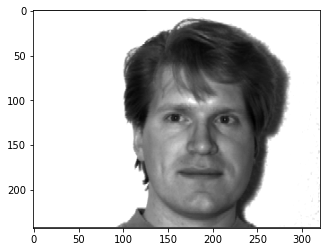

In [7]:
plt.imshow(X[0].reshape((243, 320)), cmap=plt.cm.gray)

In [8]:
X.shape

(165, 77760)

In [9]:
y = []
for i in range(11):
    for j in range(15):
        y.append(i)

In [10]:
y = np.asarray(y, dtype=np.int)

In [11]:
y.shape

(165,)

In [12]:
y.reshape(-1,1).shape

(165, 1)

In [13]:
dataset = np.append(X, y.reshape(-1,1), 1)

In [14]:
dataset.shape

(165, 77761)

In [15]:
np.random.shuffle(dataset)

In [16]:
dataset

array([[130., 130., 130., ...,  68.,  68.,   7.],
       [130., 130., 130., ...,  68.,  68.,   8.],
       [130., 130., 130., ...,  68.,  68.,   8.],
       ...,
       [130., 130., 130., ...,  68.,  68.,   2.],
       [130., 130., 130., ...,  68.,  68.,   9.],
       [130., 130., 130., ...,  68.,  68.,   1.]])

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [18]:
train_set.shape

(132, 77761)

In [19]:
test_set.shape

(33, 77761)

In [20]:
X_train = train_set[:,:-1]
y_train = train_set[:,-1:]
X_test = test_set[:,:-1]
y_test = test_set[:,-1:]

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(132, 77760)
(132, 1)
(33, 77760)
(33, 1)


In [23]:
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier # MultiLayer Perceptron

# Compute a PCA 
# n_components = 132 # To go from 2914 features per instance to 100 features
pca = PCA(n_components=45, whiten=True).fit(X_train) # Whitening simply means to make the  resulting data have a unit variance

# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [25]:
from sklearn.ensemble import RandomForestClassifier

print("Fitting the classifier to the training set")
i = 1
if i == 1:
    clf = MLPClassifier(hidden_layer_sizes=(1024,500,700,550,400,200,100), activation='tanh', 
                    solver='lbfgs',batch_size=10, verbose=True, early_stopping=False, 
                    max_iter=5000).fit(X_train_pca, y_train)
else:
    clf = RandomForestClassifier(n_estimators=10000).fit(X_train_pca, y_train)
# hidden_layer_sizes = (25,11,7,5,3,) means an architecture of input -> 25 neurons of the first hidden layer -> 11 neurons of the
# second hidden layer -> ... -> 3 neurons of the fifth hidden layer -> output


Fitting the classifier to the training set


In [26]:
clf

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1024, 500, 700, 550, 400, 200, 100),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=5000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False)

In [28]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 centerlight       0.25      0.33      0.29         3
     glasses       0.00      0.00      0.00         5
       happy       0.25      0.50      0.33         2
   leftlight       1.00      0.75      0.86         4
   noglasses       0.00      0.00      0.00         3
      normal       0.00      0.00      0.00         1
  rightlight       0.75      0.75      0.75         4
         sad       0.00      0.00      0.00         3
      sleepy       0.00      0.00      0.00         3
   surprised       0.00      0.00      0.00         1
        wink       0.00      0.00      0.00         4

    accuracy                           0.24        33
   macro avg       0.20      0.21      0.20        33
weighted avg       0.25      0.24      0.24        33



c:\users\calvintai0402\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
pca.components_.shape

(45, 77760)

In [30]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    
#     plt.subplots_adjust(wspace=1.5, hspace=0.8)
    plt.tight_layout()

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[int(y_pred[i])].split(' ')[-1]
        true_name = target_names[int(y_test[i])].split(' ')[-1]
        yield 'pred: {0}\ntrue: {1}'.format(pred_name, true_name)

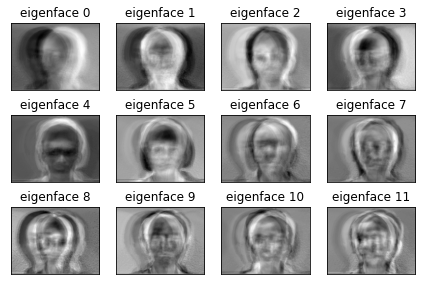

In [31]:
eigenfaces = pca.components_.reshape((45, h, w)) # The eigenfaces are the "mean" faces, that preserve the most variance
eigenface_titles = ["eigenface {0}".format(i) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

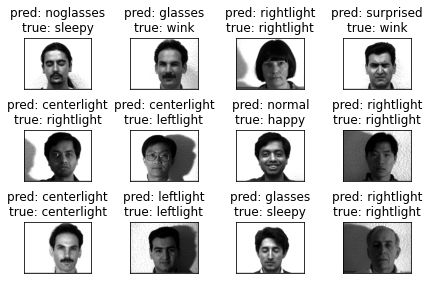

In [32]:
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

In [33]:
# No matter how much I train it, the predictions are bad...due to the lack of data. Now we will try to artificially generate data. See the EigenFaces_DataAuf notebook